In [1]:
import pandas as pd
import numpy as np
import lbg_forecast.noise as noise
import lbg_forecast.colour_cuts as cuts
import matplotlib.pyplot as plt
import lbg_forecast.utils as utils

In [2]:
real = 0
photometry = np.load("./photo_samples/photo_test.npy")[real]
sps_parameters = np.load("./sps_parameter_samples/sps_test.npy")[real]

In [3]:
cat = noise.setup_catalog(photometry)
cat

,u,g,r,i,z,u5,g5,r5,i5,z5,u2,g2,r2,i2,z2
0,28.664071,28.713716,28.977229,28.231850,26.826853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27.626638,28.177189,28.359729,28.069567,29.270647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27.595322,28.713582,29.360171,27.844599,27.973678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.224716,NaN
3,27.620831,29.742654,28.875442,28.384569,30.958777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.755825,29.547346,28.332666,30.664172,29.671900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.702891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,27.455004,26.662269,26.301097,26.532552,27.346926,NaN,26.666379,26.079961,NaN,NaN,NaN,26.666379,26.079961,26.620548,NaN
199996,27.031191,29.478934,27.587733,27.822157,26.521481,NaN,NaN,NaN,NaN,NaN,26.498304,NaN,27.511034,NaN,25.965791
199997,28.335566,29.080588,31.171998,29.442417,28.361861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199998,27.393919,28.434476,30.064852,29.290954,27.053158,NaN,NaN,NaN,NaN,NaN,NaN,27.709125,NaN,NaN,NaN


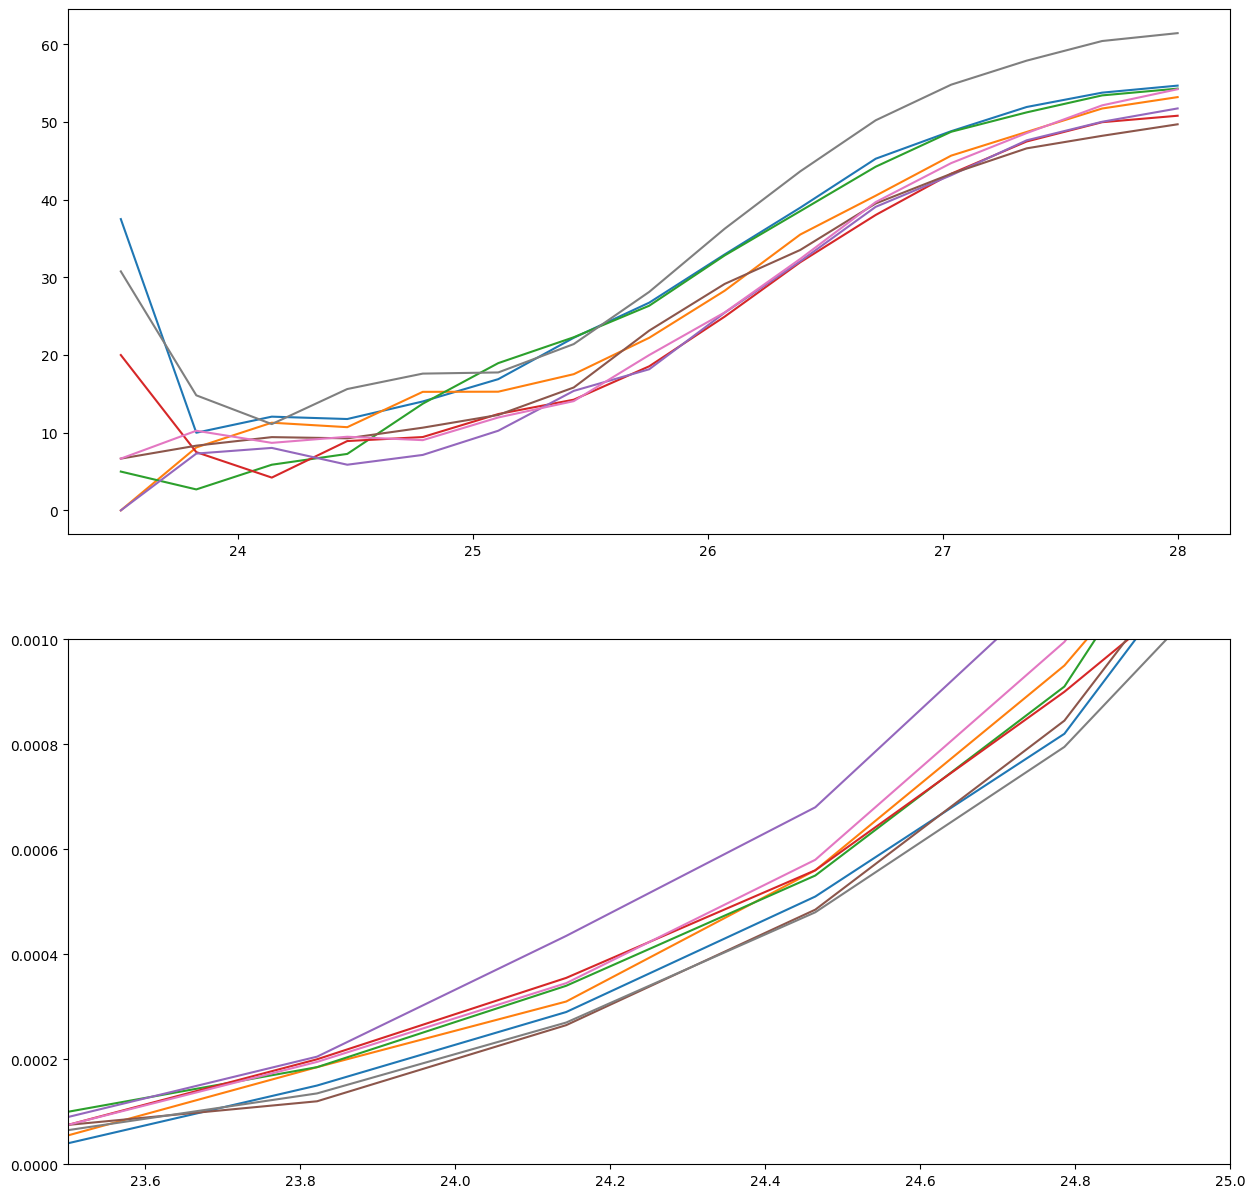

In [4]:
real = 0
band = 2
spsp = np.load("./photo_samples/photo_test.npy")
phot = np.load("./sps_parameter_samples/sps_test.npy")

f, ax = plt.subplots(2, 1, figsize=(15, 15))

for real in range(spsp.shape[0]):
    photometry = spsp[real]
    sps_parameters = phot[real]
    cat = noise.setup_catalog(photometry)
    fint = []
    depth_list = []
    trans = []
    depths = np.linspace(23.5, 28, 15)
    for depth in depths:
        udrop = noise.select_u_dropouts(cat, depth)
        u_data = noise.pack_dropout_data(udrop, sps_parameters)
        redshifts = noise.unpack_z(u_data)
        magnitudes = noise.unpack_mags(u_data, band)
        mags_all = noise.unpack_mags_all(u_data)
        colours_all = cuts.calculate_colours(mags_all)
        selected_sps,_,inds = cuts.select_dropouts_full('u', [noise.unpack_spsparams(u_data), colours_all])
        selected_redshifts = selected_sps[0][:,0]
        #plt.scatter(selected_redshifts, magnitudes[inds], alpha=0.1)
        fint.append(utils.interlopers(selected_redshifts, 2.0))
        depth_list.append(depth)
        trans.append(len(selected_redshifts)/spsp.shape[1])

    ax[0].plot(depth_list, fint)
    ax[1].plot(depth_list, trans)
    ax[1].set_xlim(23.5, 25)
    ax[1].set_ylim(0, 0.001)

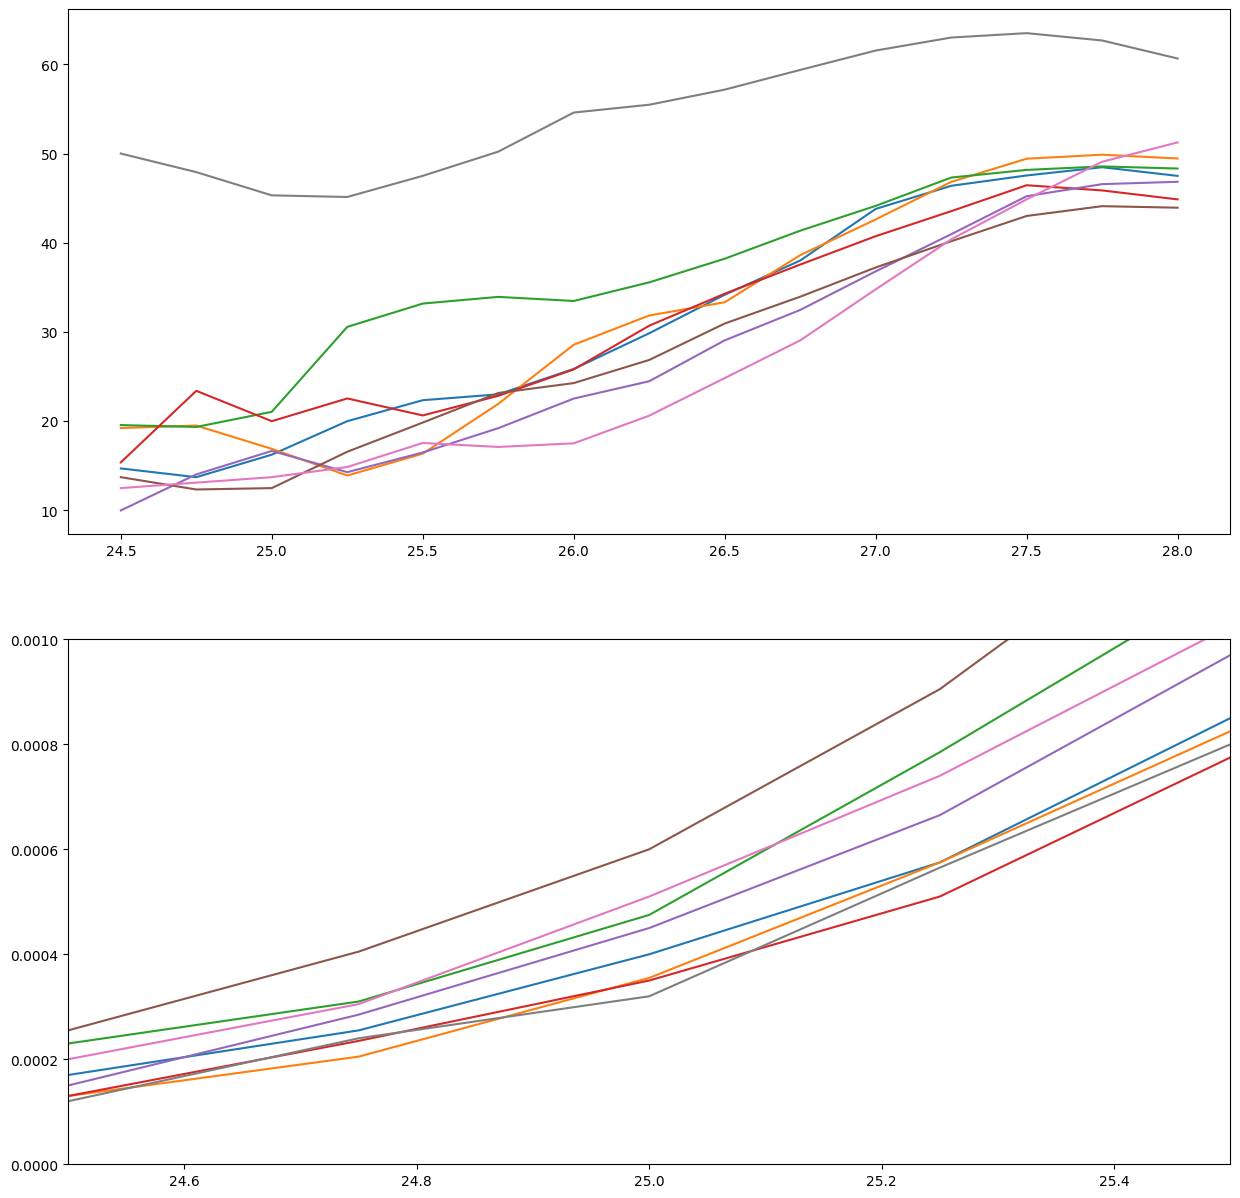

In [5]:
band = 3
spsp = np.load("./photo_samples/photo_test.npy")
phot = np.load("./sps_parameter_samples/sps_test.npy")

f, ax = plt.subplots(2, 1, figsize=(15, 15))

for real in range(spsp.shape[0]):
    photometry = spsp[real]
    sps_parameters = phot[real]
    cat = noise.setup_catalog(photometry)
    fint = []
    depth_list = []
    trans = []
    depths = np.linspace(24.5, 28, 15)
    for depth in depths:
        gdrop = noise.select_g_dropouts(cat, depth)
        g_data = noise.pack_dropout_data(gdrop, sps_parameters)
        redshifts = noise.unpack_z(g_data)
        magnitudes = noise.unpack_mags(g_data, band)
        mags_all = noise.unpack_mags_all(g_data)
        colours_all = cuts.calculate_colours(mags_all)
        selected_sps,_,inds = cuts.select_dropouts_full('g', [noise.unpack_spsparams(g_data), colours_all])
        selected_redshifts = selected_sps[0][:,0]
        #plt.scatter(selected_redshifts, magnitudes[inds], alpha=0.1)
        fint.append(utils.interlopers(selected_redshifts, 2.0))
        depth_list.append(depth)
        trans.append(len(selected_redshifts)/spsp.shape[1])

    ax[0].plot(depth_list, fint)
    ax[1].plot(depth_list, trans)
    ax[1].set_xlim(24.5, 25.5)
    ax[1].set_ylim(0, 0.001)

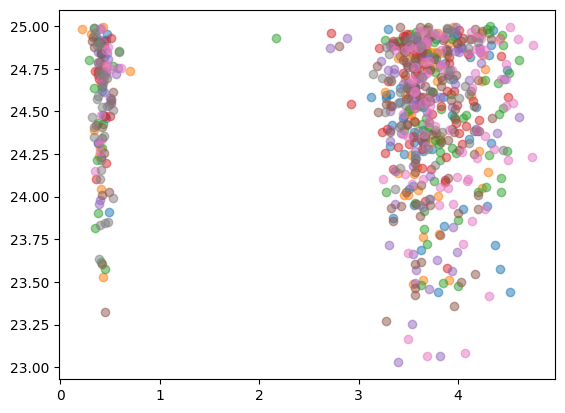

In [6]:
band = 3
spsp = np.load("./photo_samples/photo_test.npy")
phot = np.load("./sps_parameter_samples/sps_test.npy")

for real in range(spsp.shape[0]):
    photometry = spsp[real]
    sps_parameters = phot[real]
    cat = noise.setup_catalog(photometry)
    gdrop = noise.select_g_dropouts(cat, 25)
    g_data = noise.pack_dropout_data(gdrop, sps_parameters)
    redshifts = noise.unpack_z(g_data)
    magnitudes = noise.unpack_mags(g_data, band)
    mags_all = noise.unpack_mags_all(g_data)
    colours_all = cuts.calculate_colours(mags_all)
    selected_sps,_,inds = cuts.select_dropouts_full('g', [noise.unpack_spsparams(g_data), colours_all])
    selected_redshifts = selected_sps[0][:,0]
    plt.scatter(selected_redshifts, magnitudes[inds], alpha=0.5)


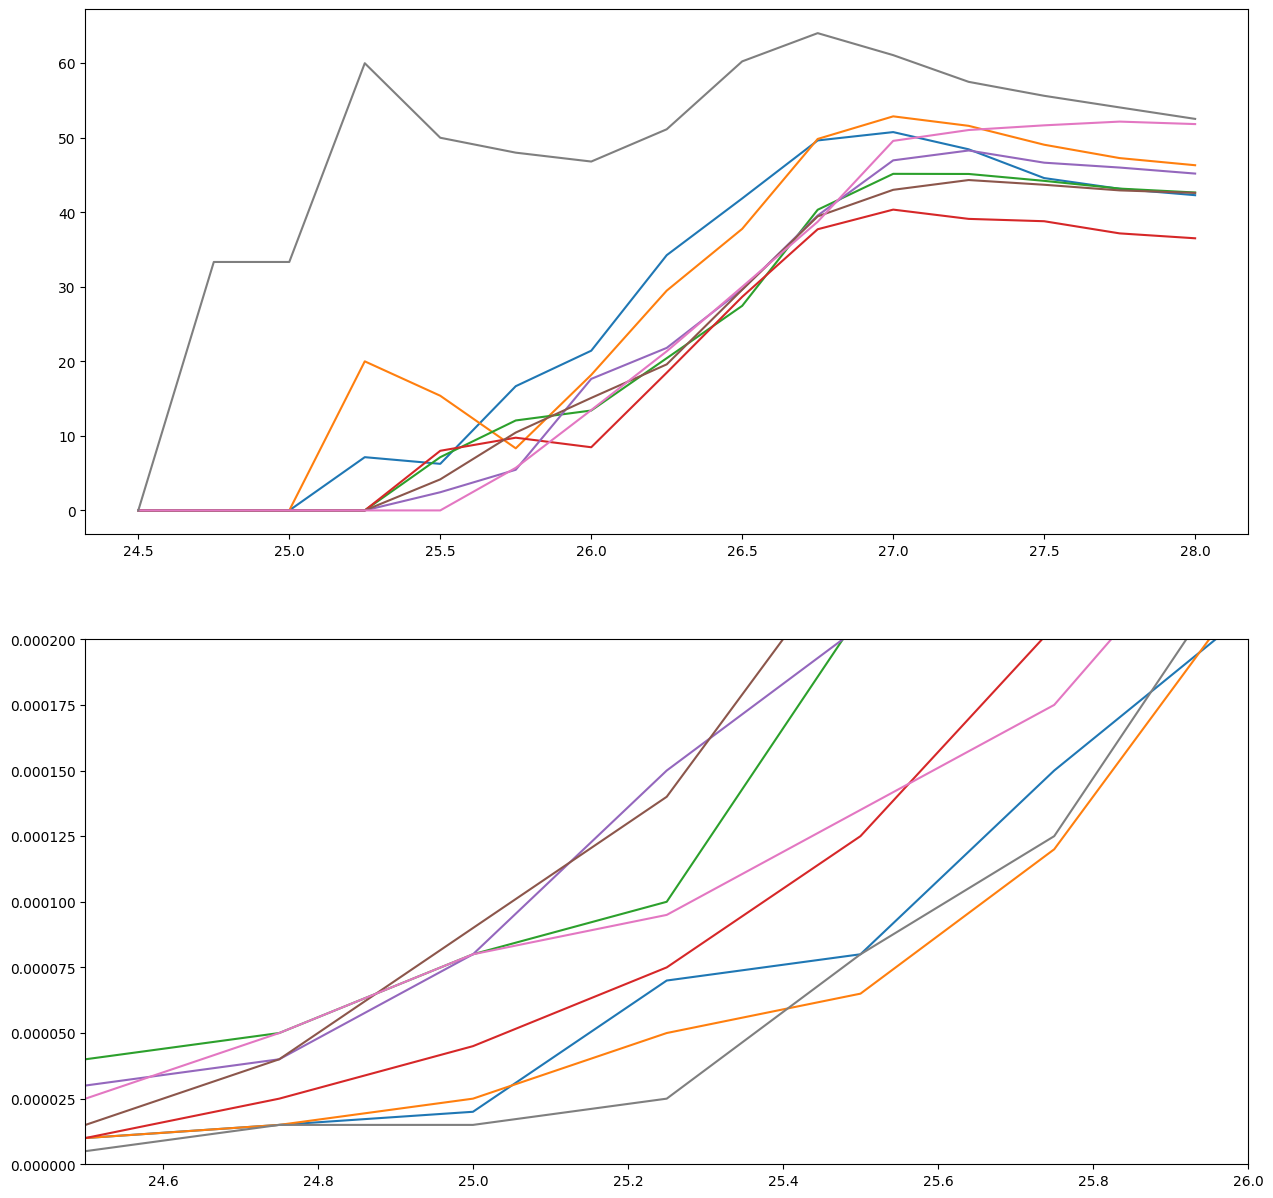

In [7]:
band = 4
spsp = np.load("./photo_samples/photo_test.npy")
phot = np.load("./sps_parameter_samples/sps_test.npy")

f, ax = plt.subplots(2, 1, figsize=(15, 15))

for real in range(spsp.shape[0]):
    photometry = spsp[real]
    sps_parameters = phot[real]
    cat = noise.setup_catalog(photometry)
    fint = []
    depth_list = []
    trans = []
    depths = np.linspace(24.5, 28, 15)
    for depth in depths:
        rdrop = noise.select_r_dropouts(cat, depth)
        r_data = noise.pack_dropout_data(rdrop, sps_parameters)
        redshifts = noise.unpack_z(r_data)
        magnitudes = noise.unpack_mags(r_data, band)
        mags_all = noise.unpack_mags_all(r_data)
        colours_all = cuts.calculate_colours(mags_all)
        selected_sps,_,inds = cuts.select_dropouts_full('r', [noise.unpack_spsparams(r_data), colours_all])
        selected_redshifts = selected_sps[0][:,0]
        #plt.scatter(selected_redshifts, magnitudes[inds], alpha=0.1)
        fint.append(utils.interlopers(selected_redshifts, 2.0))
        depth_list.append(depth)
        trans.append(len(selected_redshifts)/spsp.shape[1])

    ax[0].plot(depth_list, fint)
    ax[1].plot(depth_list, trans)
    ax[1].set_xlim(24.5, 26)
    ax[1].set_ylim(0, 0.0002)

In [8]:
cat = noise.setup_catalog(photometry)
cat.drop(cat[cat.z5 < 23].index)
cat.drop(cat[cat.z5 < 25].index)

,u,g,r,i,z,u5,g5,r5,i5,z5,u2,g2,r2,i2,z2
0,28.746424,28.626282,29.124085,28.324540,26.802048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27.187393,29.845279,29.612919,28.549150,28.488050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27.503959,28.611766,29.830093,27.898718,28.018951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.254968,NaN
3,29.114236,27.768275,28.515615,27.175793,27.499679,NaN,NaN,NaN,NaN,NaN,NaN,27.606192,NaN,26.870950,NaN
4,28.759297,28.653813,27.428699,27.759995,27.477554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.109262,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,27.954850,29.654614,29.083921,27.631600,27.182023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.463636
199995,27.885094,28.901440,27.442350,28.614820,27.637074,NaN,NaN,26.902029,NaN,NaN,NaN,NaN,26.902029,NaN,NaN
199996,26.754545,26.365994,26.131386,26.155506,25.669051,NaN,26.575649,26.110739,26.254516,25.379982,26.320665,26.575649,26.110739,26.254516,25.379982
199998,27.404604,28.461268,31.628119,29.008931,27.014747,NaN,NaN,NaN,NaN,NaN,NaN,27.722784,NaN,NaN,NaN
